In [2]:
from scipy.io import loadmat
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [34]:
ID = '07'
h = '32h'

data = loadmat('../data/ID' + ID + '_' + h + '.mat')
info = loadmat('../data/ID' + ID + '_info.mat')
data = data['EEG']
fs = float(info['fs'])

begin_sample = 0
end_sample = int(50*60*fs)


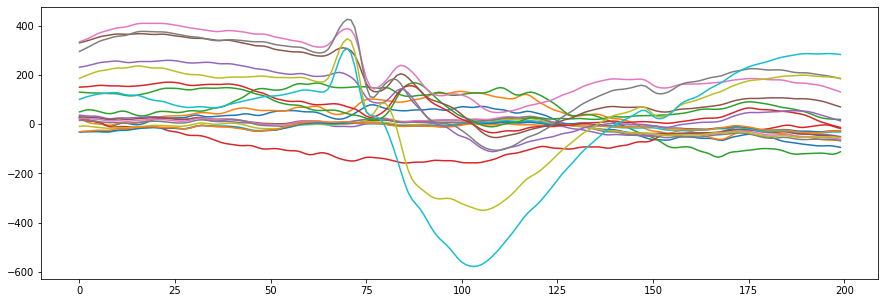

In [43]:
plt.figure(figsize=(15, 5))
plt.plot(data[40:60, :200].T)

Text(0.5, 0, 'Time [min]')

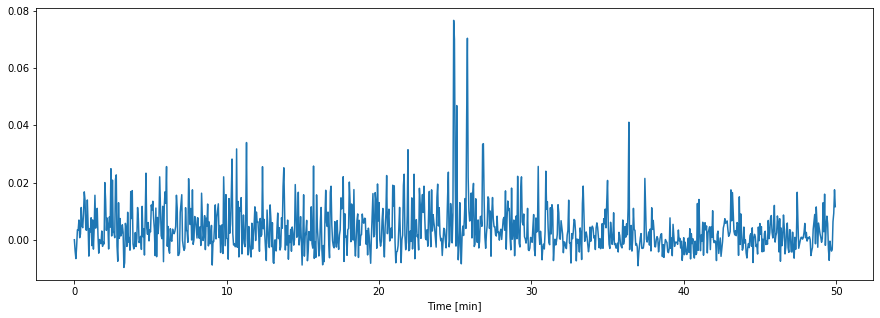

In [35]:
# Check for connectome derivative
win_delta = int(5*fs)
win_size = int(3*fs)  # Must be smaller than win_delta
sample_size = end_sample - begin_sample
n_win = int(np.floor(sample_size / t_delta))
corrmat = []
corrmat.append(np.zeros((data.shape[0], data.shape[0])))
corrderiv = []
for i in range(n_win):
    begin_win = begin_sample + i * t_delta
    end_win = begin_win + win_size
    corrmat.append(np.corrcoef(data[:, begin_win:end_win]))
    corrderiv.append(np.mean(np.ravel(corrmat[i - begin_sample + 1] - corrmat[1])))
    
plt.figure(figsize=(15, 5))
tvec = np.linspace(begin_sample/60/fs, begin_win/60/fs, n_win)
plt.plot(tvec, corrderiv)
plt.xlabel('Time [min]')

In [37]:
print(12*60)
print(n_win)

720
1000


C:\Users\janse\Anaconda3\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\janse\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\janse\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\janse\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\janse\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


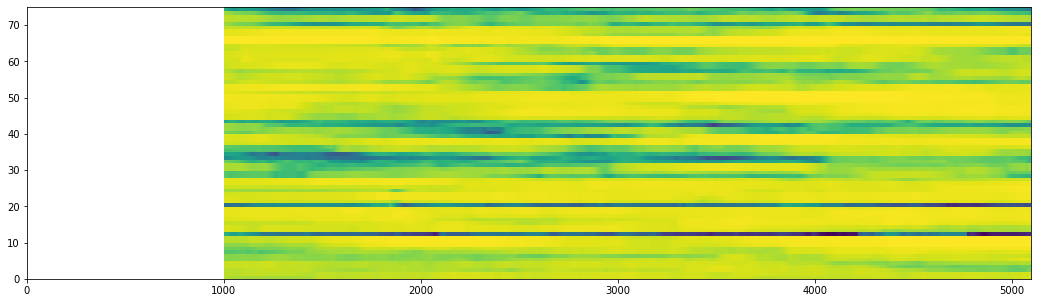

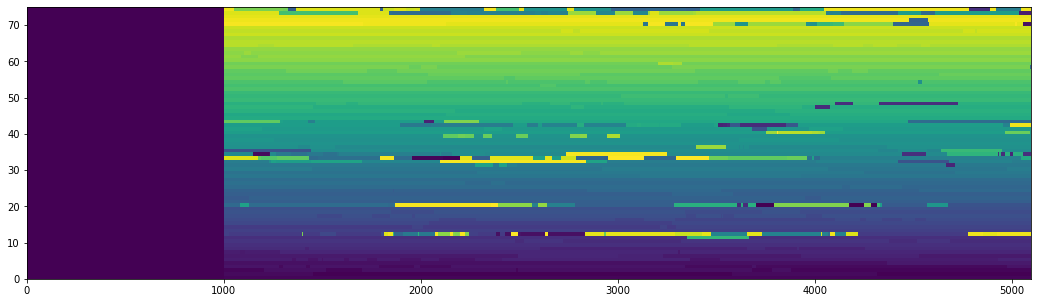

In [3]:
# Check for winsize
win_size = end_sample - begin_sample
inv_diagmat = np.abs(np.identity(data.shape[0])-1)
corr_val = np.zeros((data.shape[0], win_size))
corr_idx = np.zeros((data.shape[0], win_size))
for i in range(begin_sample, end_sample):
    corrmat = np.multiply(np.corrcoef(data[:, int(i-2*fs):i]), inv_diagmat)
    corr_val[:, i - begin_sample] = np.max(np.abs(corrmat), axis=0)
    corr_idx[:, i - begin_sample] = np.argmax(np.abs(corrmat), axis=0)
    if i % int(1*10*fs) == 0:
        print(i/fs/60)

plt.figure(figsize=(18, 5))
plt.pcolor(corr_val)
plt.figure(figsize=(18, 5))
plt.pcolor(corr_idx)
    
    

In [ ]:
corrmats = np.zeros((data.shape[0], data.shape[0], int((data.shape[1] - nperseg) / (nperseg - noverlap))))
for i in range(corrmats.shape[2]):
    corrmats[:, :, i] = np.corrcoef(data[:, int(i * (nperseg - noverlap)):int(i * (nperseg - noverlap) + nperseg)])
corr_val = np.mean(np.mean(np.abs(corrmats), axis=0), axis=0)

In [62]:
a = np.array([1,2,3,1,2,1,1,1,3,2,2,1])
counts = np.bincount(a, axis=0)
print(counts)

TypeError: bincount() got an unexpected keyword argument 'axis'

In [8]:
np.corrcoef(data[:, 1*n_win:1*n_win+n_win]).shape

(75, 75)